<a href="https://colab.research.google.com/github/SadeenAlsabbagh/Solar_System_Dynamics_Computational_Physics-/blob/main/FKaba_PositionVStime_JPL_Horizons_Queries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Get the position versus time of the new moon in julian date**

In [ ]:
pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 22.2 MB/s eta 0:00:00


**Installing the necessary libraries we need**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import get_body, solar_system_ephemeris
import astropy.units as u
from astropy.time import Time
from astroquery.jplhorizons import Horizons

**In the code block below, we created an assignment for the year and make it loop from 2002 to 2021. We also created an empty initial array that help store the right adscension of the earth and moon.**

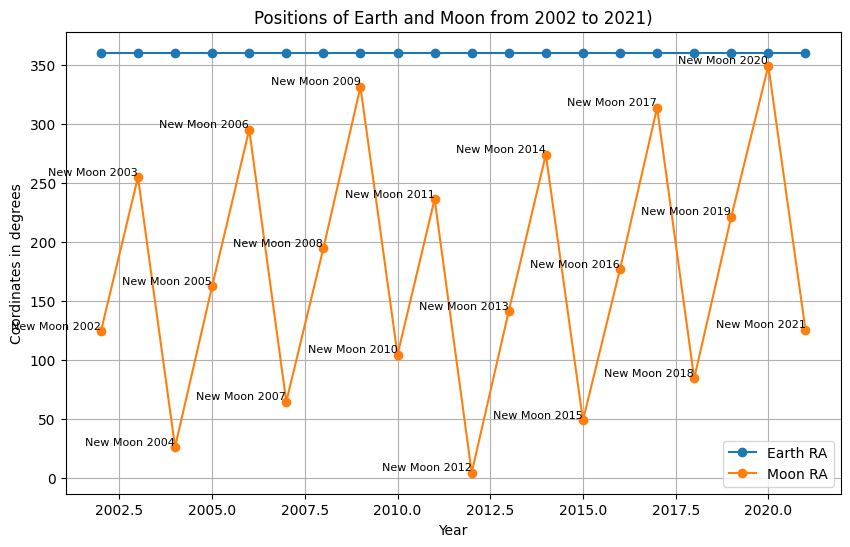

In [ ]:
years = range(2002, 2022) #year period 2002 to 2021 but I put 2022 so that the year range will be from 2002 to 2021

# Initialize arrays to store right ascension and declination
earth_ra = []
earth_dec = []
moon_ra = []
moon_dec = []

# Loop through each year
for year in years:
    time = Time(f'{year}-01-01')

    with solar_system_ephemeris.set('builtin'):
        earth = get_body('earth', time)

    with solar_system_ephemeris.set('builtin'):
        moon = get_body('moon', time)

    # Calculate the right ascension and declination of Earth and Moon
    earth_ra.append(earth.ra.deg)
    earth_dec.append(earth.dec.deg)
    moon_ra.append(moon.ra.deg)
    moon_dec.append(moon.dec.deg)

# Plot the positions of Earth and Moon
plt.figure(figsize=(10, 6))
plt.plot(years, earth_ra, label='Earth RA', marker='o')
plt.plot(years, moon_ra, label='Moon RA', marker='o')

# Add labels to indicate the position of the new moon
for i, year in enumerate(years):
    time = Time(f'{year}-01-01')
    moon_ephem = Horizons(id='301', location='500', epochs=time.jd).ephemerides()[0]
    moon_new_ra = float(moon_ephem['RA'])
    moon_new_dec = float(moon_ephem['DEC'])
    plt.text(year, moon_new_ra, f'New Moon {year}', fontsize=8, ha='right', va='bottom')

plt.xlabel('Year')
plt.ylabel('Coordinates in degrees')
plt.title('Positions of Earth and Moon from 2002 to 2021)')
plt.legend()
plt.grid(True)
plt.show()


**In the code block below, we wanted to see the interaction between the right adscension and declination of the earth and moon. We started by reinitializing the arrays into empty arrays because the previous arrays created could not be recalled since they are no longer empty. The new array created would then loop through each year and append the array at the end.**

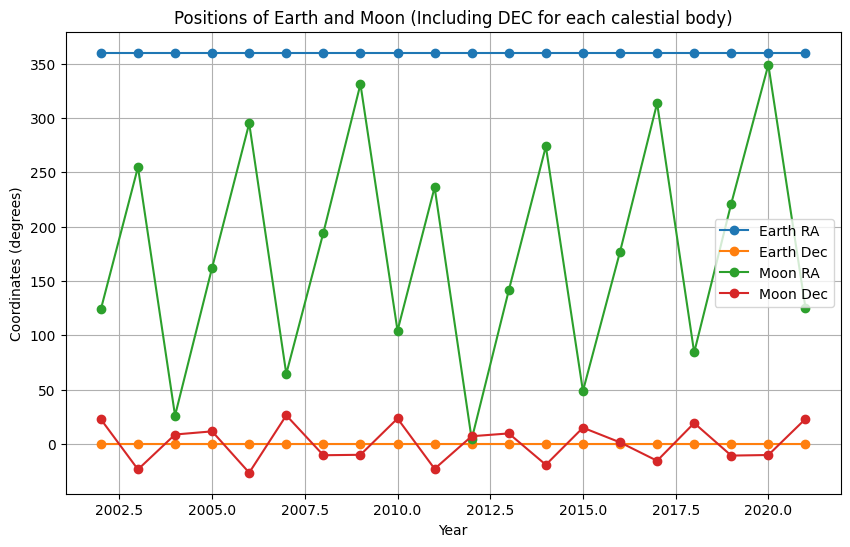

In [ ]:
#We re-initialize the arrays because the previous is not working
earth_RA = []
earth_Dec = []
moon_RA = []
moon_Dec = []

# Loop through each year from 2002 to 2020
for year in years:
    time = Time(f'{year}-01-01')

    # POSITION OF THE EARTH
    with solar_system_ephemeris.set('builtin'):
        earth = get_body('earth', time)

    # POSITION OF THE MOON
    with solar_system_ephemeris.set('builtin'):
        moon = get_body('moon', time)

    # RIGHT ASCENSION and DECLINATION of Earth and Moon
    earth_RA.append(earth.ra.deg)
    earth_Dec.append(earth.dec.deg)
    moon_RA.append(moon.ra.deg)
    moon_Dec.append(moon.dec.deg)

plt.figure(figsize=(10, 6))
plt.plot(years, earth_RA, label='Earth RA', marker='o')
plt.plot(years, earth_Dec, label='Earth Dec', marker='o')
plt.plot(years, moon_RA, label='Moon RA', marker='o')
plt.plot(years, moon_Dec, label='Moon Dec', marker='o')
plt.xlabel('Year')
plt.ylabel('Coordinates (degrees)')
plt.title('Positions of Earth and Moon (Including DEC for each calestial body)')
plt.legend()
plt.grid(True)
plt.show()


**The code below is used to locate the position of the new moon position relative to the earth for each year throughtout the 19 years. For this, we set up the figure size of each of our plot and list how many plots we want in each row and each column. Then we use a for loop again to loop through each year while extending the position of the new moon.**

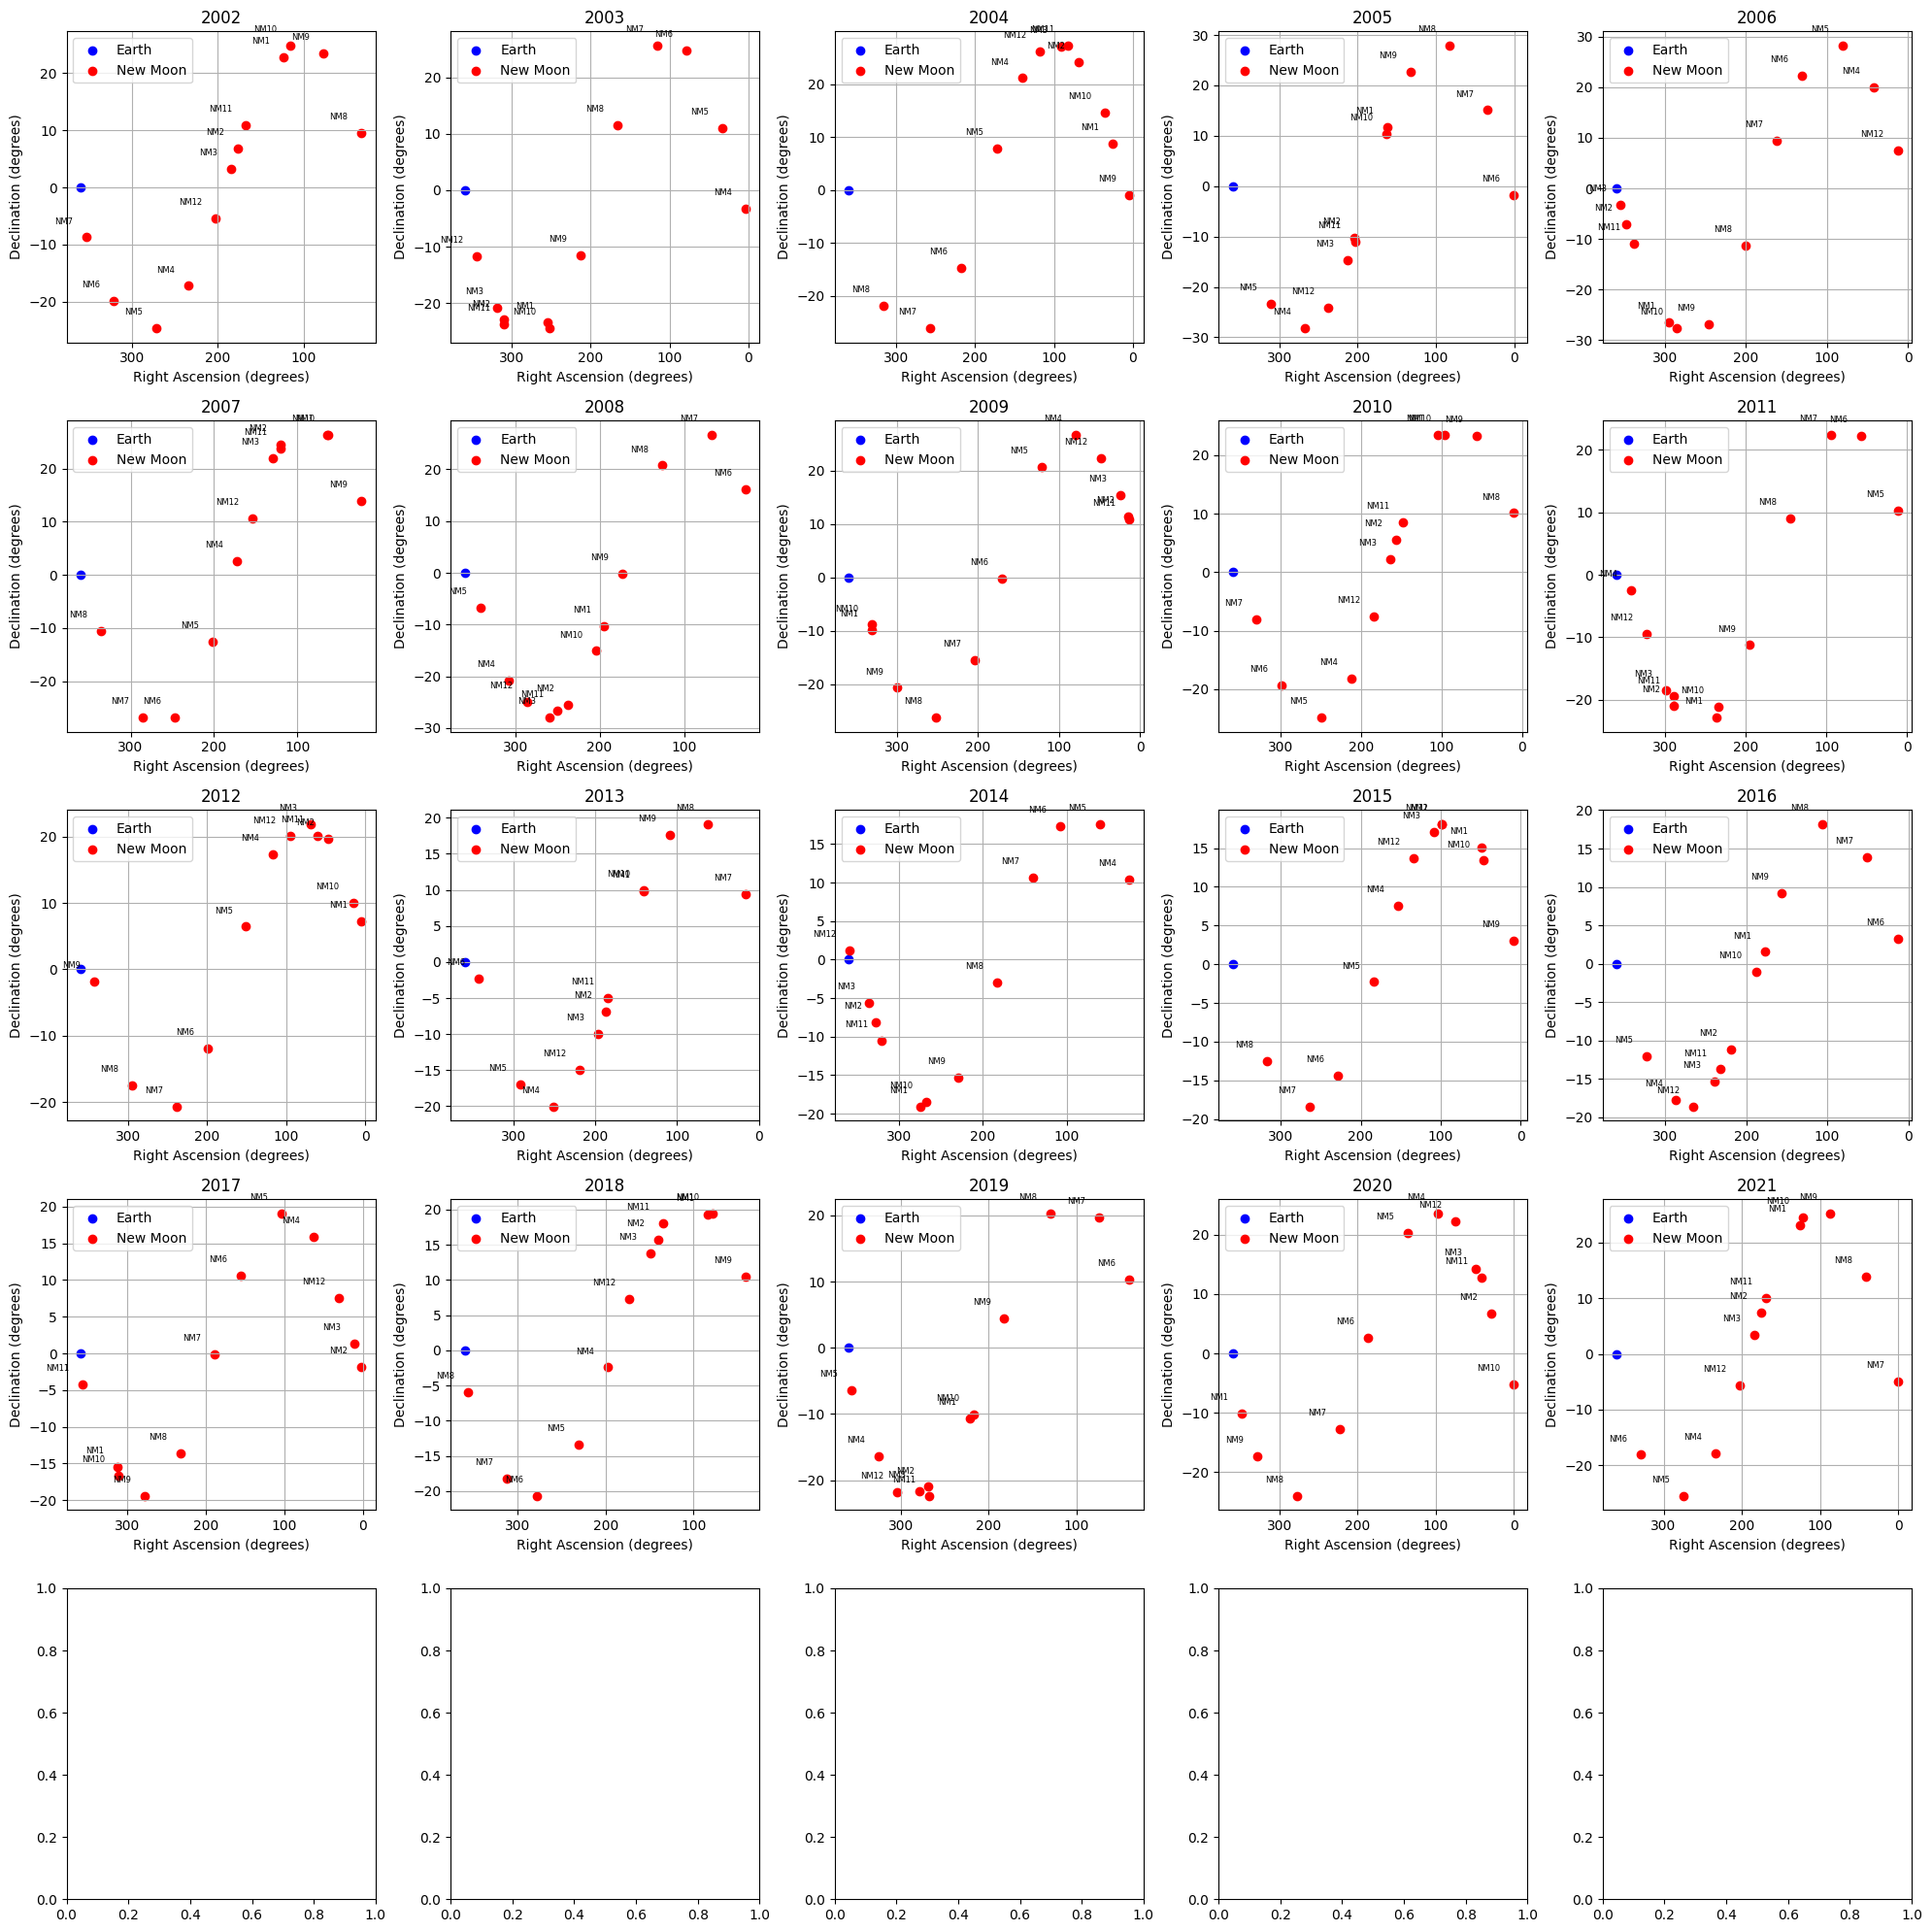

In [ ]:
# Set figure size and subplot layout
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

# Flatten the 2D array of axes into a 1D array
axs = axs.flatten()

# Loop through each year
for i, year in enumerate(years):
    # Initialize arrays to store right ascension and declination of new moons
    new_moon_ra = []
    new_moon_dec = []

    # Set time to January 1st of the current year
    time = Time(f'{year}-01-01')

    # Get the position of the Earth
    with solar_system_ephemeris.set('builtin'):
        earth = get_body('earth', time)

    # Get the position of the Moon
    with solar_system_ephemeris.set('builtin'):
        moon = get_body('moon', time)

    # Query JPL Horizons to get the positions of new moons throughout the year
    for month in range(1, 13):
        # Set time to the first day of each month
        month_time = Time(f'{year}-{month:02d}-01')
        # Query new moon positions for the current month
        moon_ephem = Horizons(id='301', location='500', epochs=month_time.jd).ephemerides()
        # Extract the position of the new moon
        new_moon_ra.extend(moon_ephem['RA'].data)
        new_moon_dec.extend(moon_ephem['DEC'].data)

    # Plot the positions of Earth, Moon, and new moons for the current year
    axs[i].scatter(earth.ra.deg, earth.dec.deg, c='blue', label='Earth', marker='o')
    axs[i].scatter(new_moon_ra, new_moon_dec, c='red', label='New Moon', marker='o')
    axs[i].set_xlabel('Right Ascension (degrees)')
    axs[i].set_ylabel('Declination (degrees)')
    axs[i].set_title(f'{year}')
    axs[i].grid(True)
    axs[i].invert_xaxis()  # Invert x-axis for astronomical convention

    # Add legend
    axs[i].legend()

    # Annotate the plot with labels for each new moon
    for j, (ra, dec) in enumerate(zip(new_moon_ra, new_moon_dec)):
        axs[i].annotate(f'NM{j+1}', (ra, dec), textcoords="offset points", xytext=(-10,10), ha='right', fontsize=6)

plt.tight_layout()
plt.show()

**In the code below, we shows the trajectory and identifies the new moon as the point in each year where the distance between the Earth and Moon is at the minimum distance to each other.**


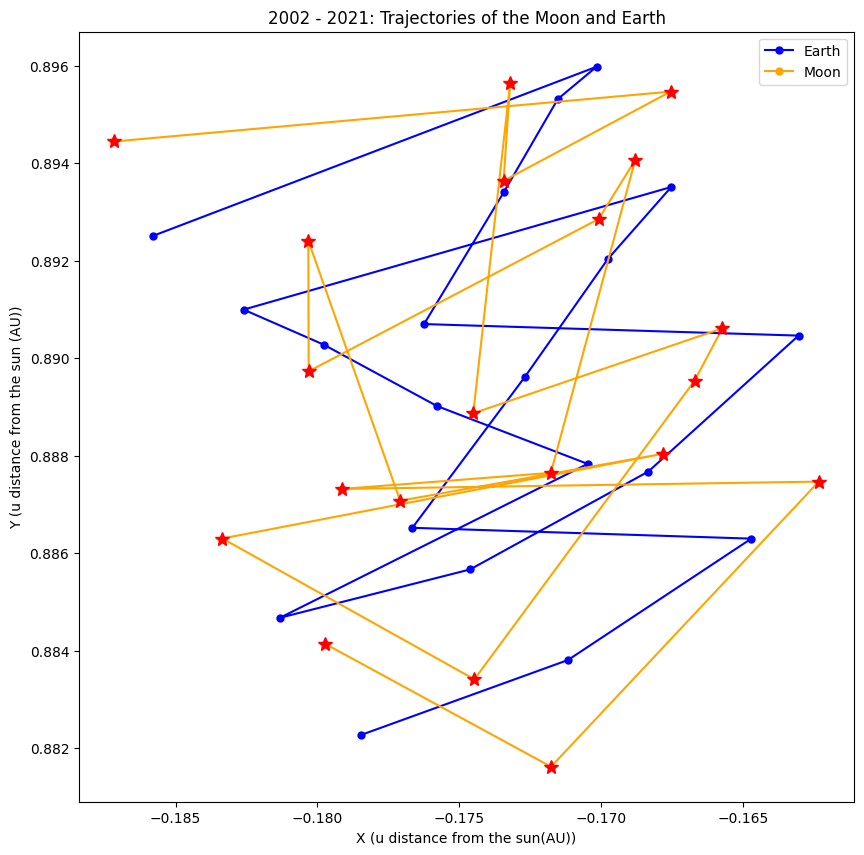

In [ ]:
from astropy.coordinates import get_body_barycentric, solar_system_ephemeris

# Initialize arrays to store positions of Earth and Moon
earth_positions = []
moon_positions = []
new_moon_indices = []  # Store indices of new moon occurrences

# Loop through each year
for year in years:
    # Set time to January 1st of the current year
    time = Time(f'{year}-01-01')

    # Get the position of the Earth in the barycentric reference frame
    with solar_system_ephemeris.set('builtin'):
        earth = get_body_barycentric('earth', time)

    # Get the position of the Moon in the barycentric reference frame
    with solar_system_ephemeris.set('builtin'):
        moon = get_body_barycentric('moon', time)

    # Append positions to the arrays
    earth_positions.append(earth.xyz.value[:2])  # Remove z-coordinate
    moon_positions.append(moon.xyz.value[:2])    # Remove z-coordinate

    # Calculate the distances between the Earth and Moon
    earth_to_moon_distances = np.linalg.norm(moon.xyz.value[:2] - earth.xyz.value[:2])
    # Check if the distance is minimum (indicating new moon)
    if np.isclose(earth_to_moon_distances, np.min(earth_to_moon_distances)):
        new_moon_indices.append(len(earth_positions) - 1)

# Convert lists to numpy arrays for easier manipulation
earth_positions = np.array(earth_positions)
moon_positions = np.array(moon_positions)

# Plot trajectories and mark new moon occurrences
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Plot Earth's trajectory
earth_handle, = ax.plot(earth_positions[:, 0], earth_positions[:, 1], marker='o', markersize=5, color='blue')

# Plot Moon's trajectory
moon_handle, = ax.plot(moon_positions[:, 0], moon_positions[:, 1], marker='o', markersize=5, color='orange')

# Plot new moon occurrences
for idx in new_moon_indices:
    ax.plot(moon_positions[idx, 0], moon_positions[idx, 1], marker='*', markersize=10, color='red')

# Set labels and title
ax.set_xlabel('X (u distance from the sun(AU))') #where AU is the astronomical unit one of which is equilivant to the mean distance from the sun
ax.set_ylabel('Y (u distance from the sun (AU))')
ax.set_title('2002 - 2021: Trajectories of the Moon and Earth')

# Show legend with handles and labels
ax.legend([earth_handle, moon_handle], ['Earth', 'Moon'])

plt.show()


Resources and References:

https://ssd.jpl.nasa.gov/horizons/app.html#/


https://ssd.jpl.nasa.gov/horizons/manual.html


https://astroquery.readthedocs.io/en/latest/